In [63]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

## Exercise 8

This question involves the use of simple linear regression on the `Auto` dataset.

In [2]:
auto = pd.read_csv('../datasets/Auto.csv')

Perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor.

In [3]:
#X = pd.to_numeric(auto['horsepower'])
y = pd.to_numeric(auto['mpg'])
X = pd.to_numeric(auto['horsepower'], errors='coerce')
X = X.fillna(np.nanmean(X))

In [5]:
import statsmodels.api as sm

withIntercept = sm.add_constant(X)
model = sm.OLS(y, withIntercept).fit()
model.summary(yname='mpg', xname=['intercept', 'horsepower'], title='mpg ~ horsepower')

<class 'statsmodels.iolib.summary.Summary'>
"""
                               mpg ~ horsepower                               
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           1.45e-79
Time:                        20:56:35   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.0058      0.729     54.903      0.000      38.573      41.438
horsepower    -0.1578      0.007    -24.096      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       21.884   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.108
Skew:                           0.557   Prob(JB):                     5.82e-06
Kurtosis:                       3.464   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__(i) Is There a relationship between the predictor and the response?__

- Yes. The estimated coeficient +/- the standard error range doesn't include __0__ so there is a relationship between X and y.

__(ii) How strong is the relationship between the predictor and the response?__

- Increasing __horsepower__ by one unit decreases __mpg__ by 0.15 units.

__(iii) Is the relationship between the predictor and the response positive or negative? __

- Negative.

__(iv) What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?___

In [33]:
pred = model.get_prediction(np.array([1, 98]))
mpg = pred.predicted_mean
print('mpg for horsepower 98 = {}'.format(mpg[0]))
ci = pred.conf_int()[0]
print('95% CI = [{}, {}]'.format(ci[0], ci[1]))

mpg for horsepower 98 = 24.537027802797724
95% CI = [24.03806692700938, 25.03598867858607]


Plot the response and the predictor. Display the least squares regression line.

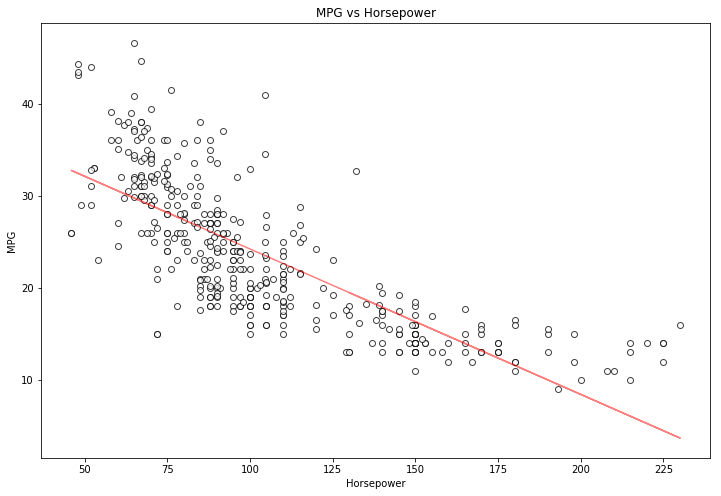

In [64]:
_, ax = plt.subplots(1, 1, figsize=(12, 8))
intercept, slope = model.params
ax.scatter(X, y, alpha=0.75, **scatter_kw)
ax.plot(X, [x * slope + intercept for x in X], **line_kw)
ax.set_title('MPG vs Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG');

Produce diagnostic plots of the least squares fit. Comment in any problems you see with the fit.

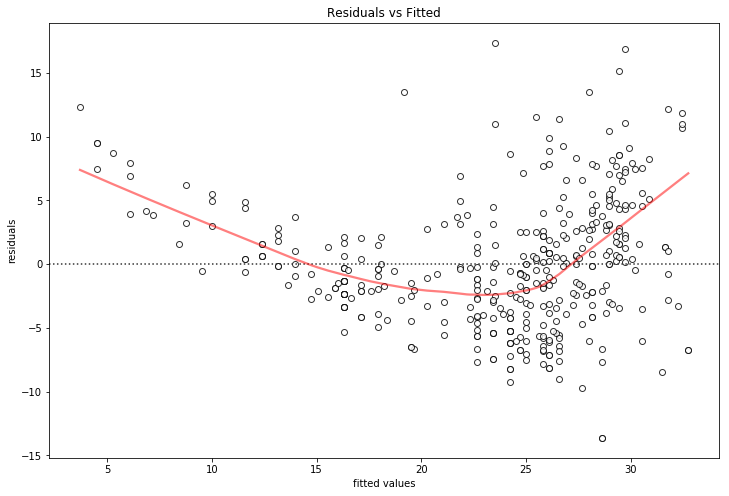

In [77]:
fitted = model.predict()
residuals = auto.mpg - fitted
_, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.residplot(fitted, residuals, lowess=True, line_kws=line_kw, scatter_kws=scatter_kw, ax=ax)
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')
ax.set_title('Residuals vs Fitted');

__Residual vs Fitted Problems:__

- The relation seems to be non-linear since residuals don't distribute normally around zero.

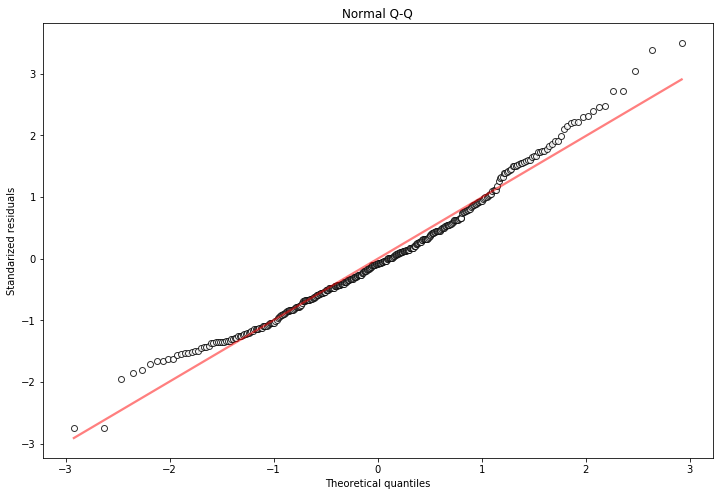

In [78]:
from scipy import stats
from sklearn import preprocessing

fig, ax = plt.subplots(1, 1, figsize=(12,8))

sd_residuals = preprocessing.scale(residuals)

(x, y), (slope, intercept, _) = stats.probplot(sd_residuals, plot=None)
ax.scatter(x, y, **scatter_kw);

ax.plot(x, [_x * slope + intercept for _x in x], **line_kw)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Standarized residuals');

__Q-Q plot Problems:__

- Standarized residuals dont follow a normal distribution, specially on extreme (low/high) quantiles.

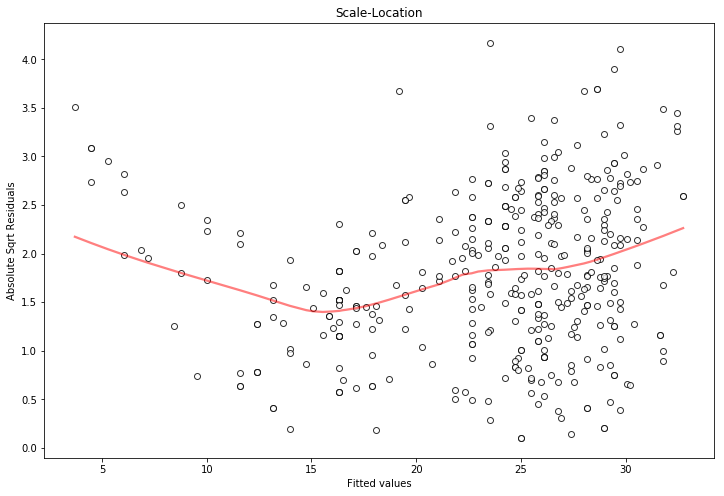

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
abs_sqrt_resid = np.sqrt(np.abs(residuals))
sns.regplot(fitted, abs_sqrt_resid, lowess=True, line_kws=line_kw, scatter_kws=scatter_kw, ax=ax)
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Absolute Sqrt Residuals');

__Scale-Location Problems:__

- There seems to be no (or al least not very strong) heteroskedasticity, residual variance stays pretty much constant around 2.0

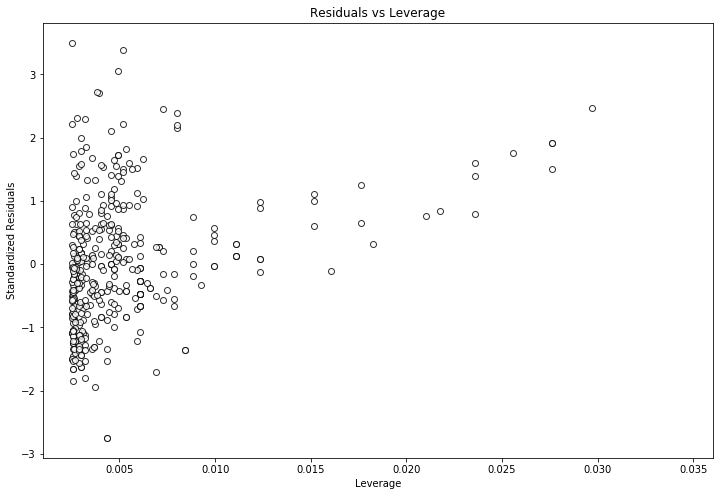

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
leverage = model.get_influence().hat_matrix_diag
ax.scatter(leverage, sd_residuals, **scatter_kw);
ax.set_xlim(0.001, )
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals');

__Leverage Problems:__

- No high leverage points detected.